In [2]:
import mlflow
from mlflow.tracking import MlflowClient
#"http://cmtcdeu82827824:5000"
mlflow.set_tracking_uri("http://cmtcdeu82827824:5000")

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def data_from_mlflow(experiment_name,filter_parentruns_key,filter_condition=None):
    #download runs
    client = MlflowClient()
    experiments = client.search_experiments(filter_string=f"name = '{experiment_name}'")
    experiment_id = experiments[0].experiment_id
    runs = client.search_runs(experiment_ids=[experiment_id],filter_string=filter_condition)
    
    #convert to pandas df and filter parent runs
    data = []
    for run in runs:
        if filter_parentruns_key in run.data.params.keys():
            metrics = run.data.metrics
            params = run.data.params
            data.append({**params,**metrics})
    df = pd.DataFrame(data)
    
    
    return df


def plot_boxplot(df, x, y, hue, x_log=False, y_log=False):
    try:
        df[x] = df[x].astype(float)
    except:
        x_log=False
    if hue is not None:
        # Sort the DataFrame by the hue values
        df = df.sort_values(by=hue)
        
        # Get the unique hue values in sorted order
        unique_hues = df[hue].unique()
        
        # Define a consistent color palette
        palette = sns.color_palette("husl", len(unique_hues))
        color_mapping = {hue_value: color for hue_value, color in zip(unique_hues, palette)}
    else:
        color_mapping = None
        unique_hues = None
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data = df,x=x, y=y,hue=hue,native_scale=True, showfliers=False,log_scale=(x_log,y_log),palette=color_mapping)
    ax.grid(True, which="both", linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    plt.title(f'Performance after 500 epochs')
    plt.show()
    
def boxplot_split(df,x,y,hue,y_log=False,x_log=False):

    df[x] = df[x].astype(float)  
    if hue is not None:
        df['Kombinierte_Hue'] = df[hue].apply(lambda row: ' '.join([f"{key}:{row[key]}" for key in hue]), axis=1)
        hue = 'Kombinierte_Hue'
            # Define a consistent color palette
        unique_hues = df['Kombinierte_Hue'].unique()
        palette = sns.color_palette("husl", len(unique_hues))
        color_mapping = {hue: color for hue, color in zip(unique_hues, palette)}
    else:
        color_mapping = None
        
    nonzero_df = df[df[x] >0]
    zero_df = df[df[x] == 0]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 8),width_ratios=(0.2,0.8), sharey=True)
    sns.boxplot(data = zero_df,x=x, y=y,hue=hue,native_scale=True, ax=axes[0],log_scale=(False,y_log),palette=color_mapping)
    sns.boxplot(data = nonzero_df,x=x, y=y,hue=hue,native_scale=True, ax=axes[1],log_scale=(x_log,y_log),palette=color_mapping)
    # Create a custom legend
    if hue is not None:
        axes[0].legend_.remove()
        axes[1].legend_.remove()
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right', ncol=2)
    
    axes[1].grid(True, which="both", linestyle='--', linewidth=0.5)
    axes[0].grid(True, which="both", linestyle='--', linewidth=0.5)
    axes[1].minorticks_on()
    axes[0].set_xticks([0])
    axes[0].set_xlabel('')
    
    plt.subplots_adjust(wspace=0)
    plt.suptitle(f'Performance after 500 epochs')
    plt.show()
    
def boxplot_split2(df, x, y, hue, y_log=False, x_log=False, hue_order=None):
    df[x] = df[x].astype(float)
    
    if hue is not None:
        df['Kombinierte_Hue'] = df[hue].apply(lambda row: ' '.join([f"{key}:{row[key]}" for key in hue]), axis=1)
        hue = 'Kombinierte_Hue'
        
        # Define a consistent color palette
        unique_hues = df['Kombinierte_Hue'].unique()
        palette = sns.color_palette("husl", len(unique_hues))
        color_mapping = {hue: color for hue, color in zip(unique_hues, palette)}
    else:
        color_mapping = None
    
    # Ensure hue_order is sorted if not provided
    if hue_order is None and hue is not None:
        hue_order = sorted(df[hue].unique())
    
    nonzero_df = df[df[x] > 0]
    zero_df = df[df[x] == 0]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), width_ratios=(0.2, 0.8), sharey=True)
    sns.boxplot(data=zero_df, x=x, y=y, hue=hue, native_scale=True, ax=axes[0], log_scale=(False, y_log), hue_order=hue_order)
    sns.boxplot(data=nonzero_df, x=x, y=y, hue=hue, native_scale=True, ax=axes[1], log_scale=(x_log, y_log), palette=color_mapping, hue_order=hue_order)
    
    # Create a custom legend
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right', ncol=2)
    
    axes[1].grid(True, which="both", linestyle='--', linewidth=0.5)
    axes[0].grid(True, which="both", linestyle='--', linewidth=0.5)
    axes[1].minorticks_on()
    axes[0].set_xticks([0])
    axes[0].set_xlabel('')
    
    plt.subplots_adjust(wspace=0)
    plt.suptitle('Performance after 500 epochs')
    plt.show()
    
def boxplot_split_sorted(df, x, y, hue, y_log=False, x_log=False):
    df[x] = df[x].astype(float)
    
    if hue is not None:
        # Sort the DataFrame by the hue values
        df = df.sort_values(by=hue)
        
        # Get the unique hue values in sorted order
        unique_hues = df[hue].unique()
        
        # Define a consistent color palette
        palette = sns.color_palette("husl", len(unique_hues))
        color_mapping = {hue_value: color for hue_value, color in zip(unique_hues, palette)}
    else:
        color_mapping = None
        unique_hues = None
    
    nonzero_df = df[df[x] > 0]
    zero_df = df[df[x] == 0]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), width_ratios=(0.2, 0.8), sharey=True)
    sns.boxplot(data=zero_df, x=x, y=y, hue=hue, native_scale=True, ax=axes[0], log_scale=(False, y_log), palette=color_mapping, hue_order=unique_hues)
    sns.boxplot(data=nonzero_df, x=x, y=y, hue=hue, native_scale=True, ax=axes[1], log_scale=(x_log, y_log), palette=color_mapping, hue_order=unique_hues)
    
    # Create a custom legend
    if hue is not None:
        axes[0].legend_.remove()
        axes[1].legend_.remove()
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right', ncol=2,title = hue)
    
    axes[1].grid(True, which="both", linestyle='--', linewidth=0.5)
    axes[0].grid(True, which="both", linestyle='--', linewidth=0.5)
    axes[1].minorticks_on()
    axes[0].set_xticks([0])
    axes[0].set_xlabel('')
    
    plt.subplots_adjust(wspace=0)
    plt.suptitle(f'Performance after 500 epochs')
    plt.show()

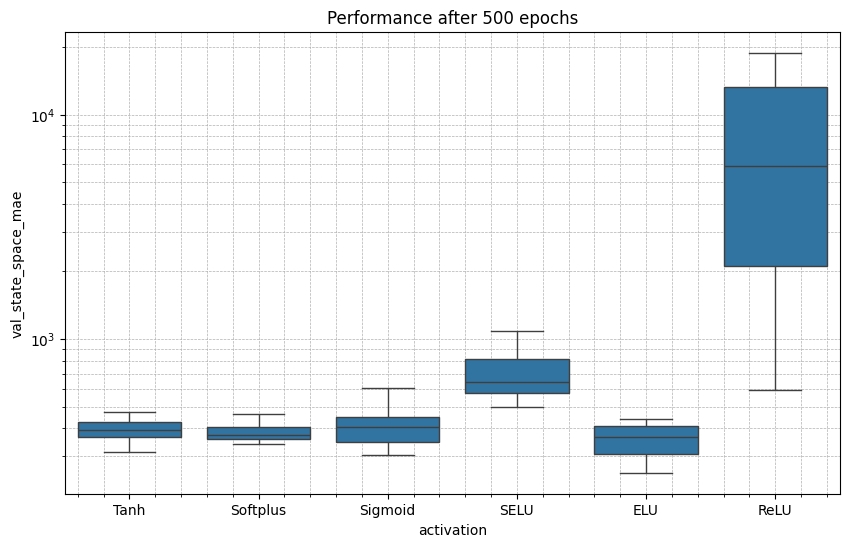

In [3]:
df = data_from_mlflow("activation","activation")
plot_boxplot(df,"activation","val_state_space_mae",None,True,True)


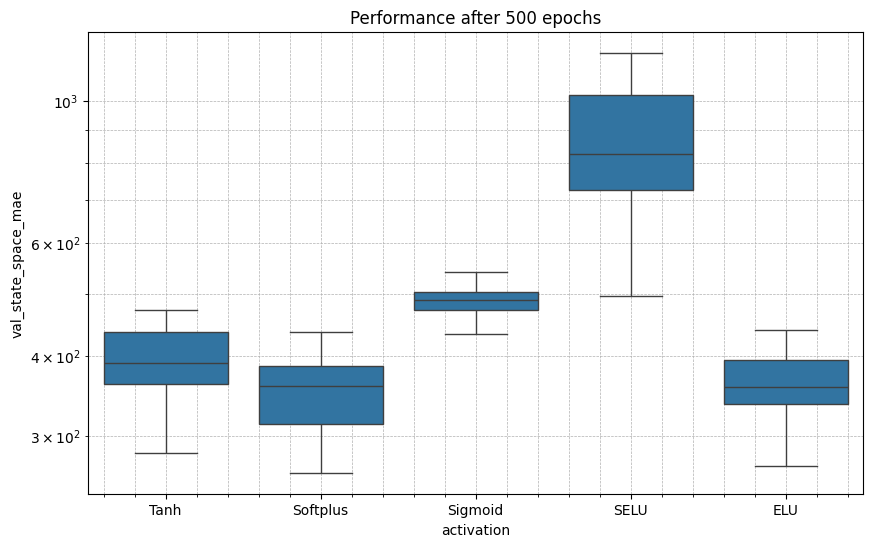

In [25]:
import datetime
df_correct = data_from_mlflow("activation","activation",f"attributes.created >=1738594991357")
plot_boxplot(df_correct,"activation","val_state_space_mae",None,True,True)

In [10]:
int(datetime.datetime.now().timestamp()*1000-25*60*60*1000)


1738594991357

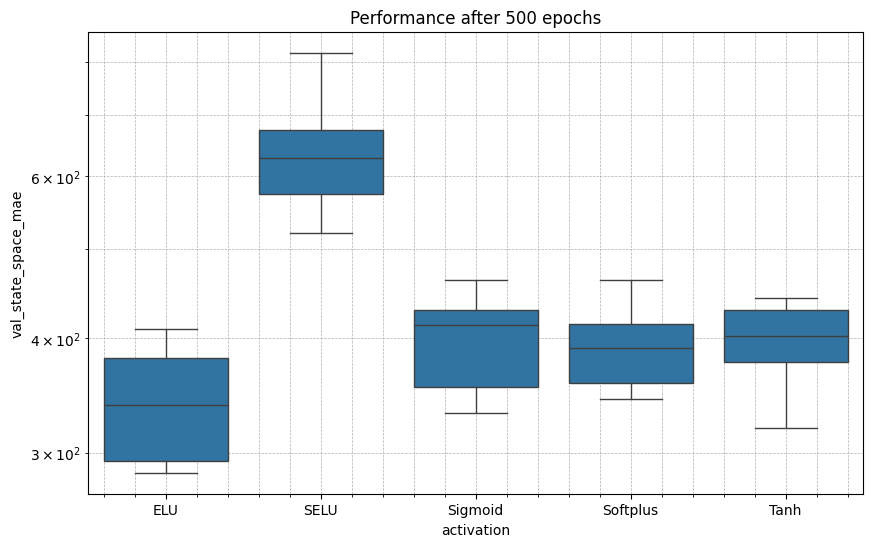

In [26]:

df_error = data_from_mlflow("activation","activation",f"attributes.created <= 1738594991357 AND params.activation  != 'ReLU'")
plot_boxplot(df_error,"activation","val_state_space_mae",None,True,True)

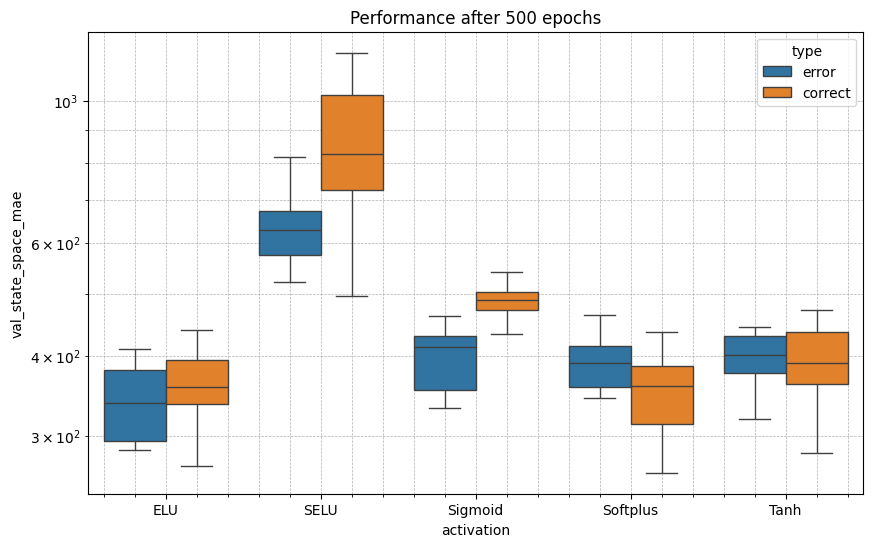

In [22]:
df_error["type"] = "error"
df_correct["type"] = "correct"
plot_df = pd.concat([df_error,df_correct])
plot_boxplot(plot_df,"activation","val_state_space_mae","type",True,True)

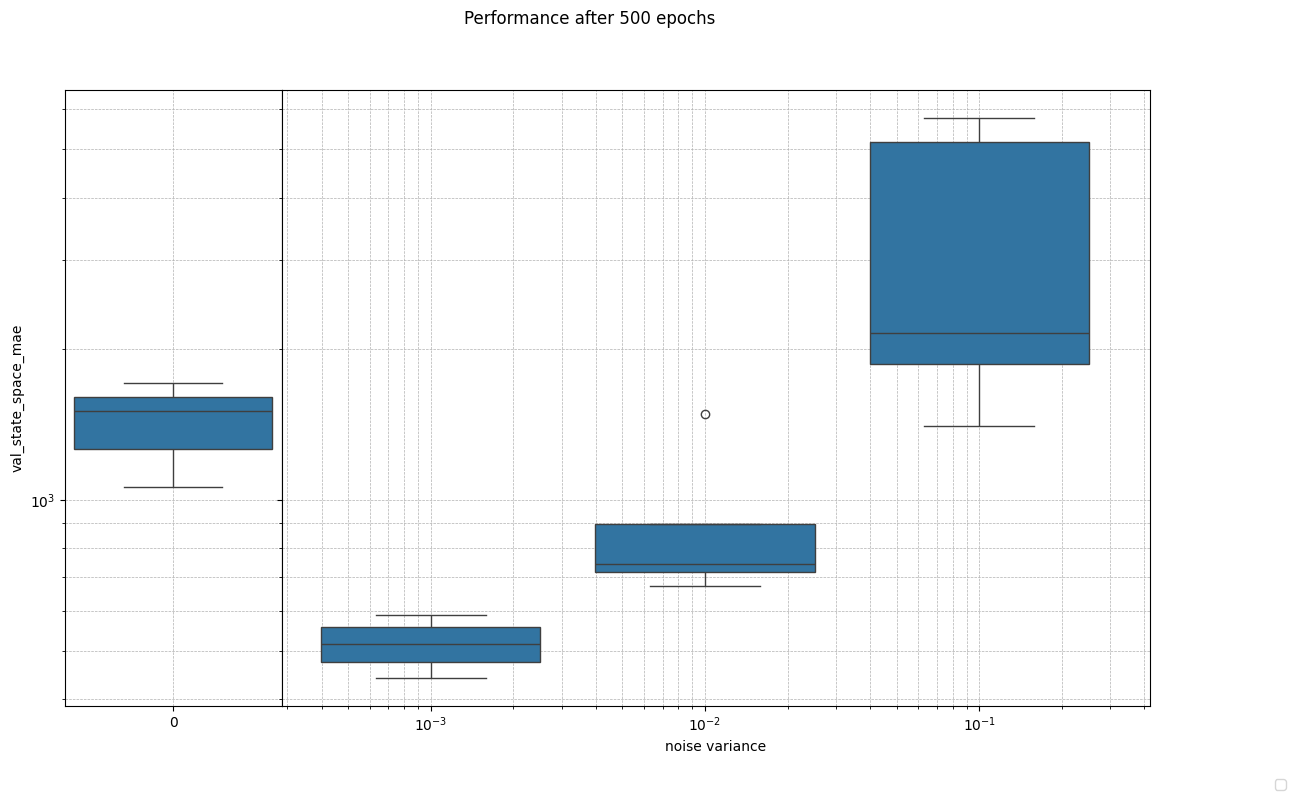

In [7]:
df = data_from_mlflow("noise influence","noise variance",filter_condition="params.static_offset_i = '0.0' AND attributes.created >= 1737068400000")
boxplot_split(df,"noise variance","val_state_space_mae",None,True,True)

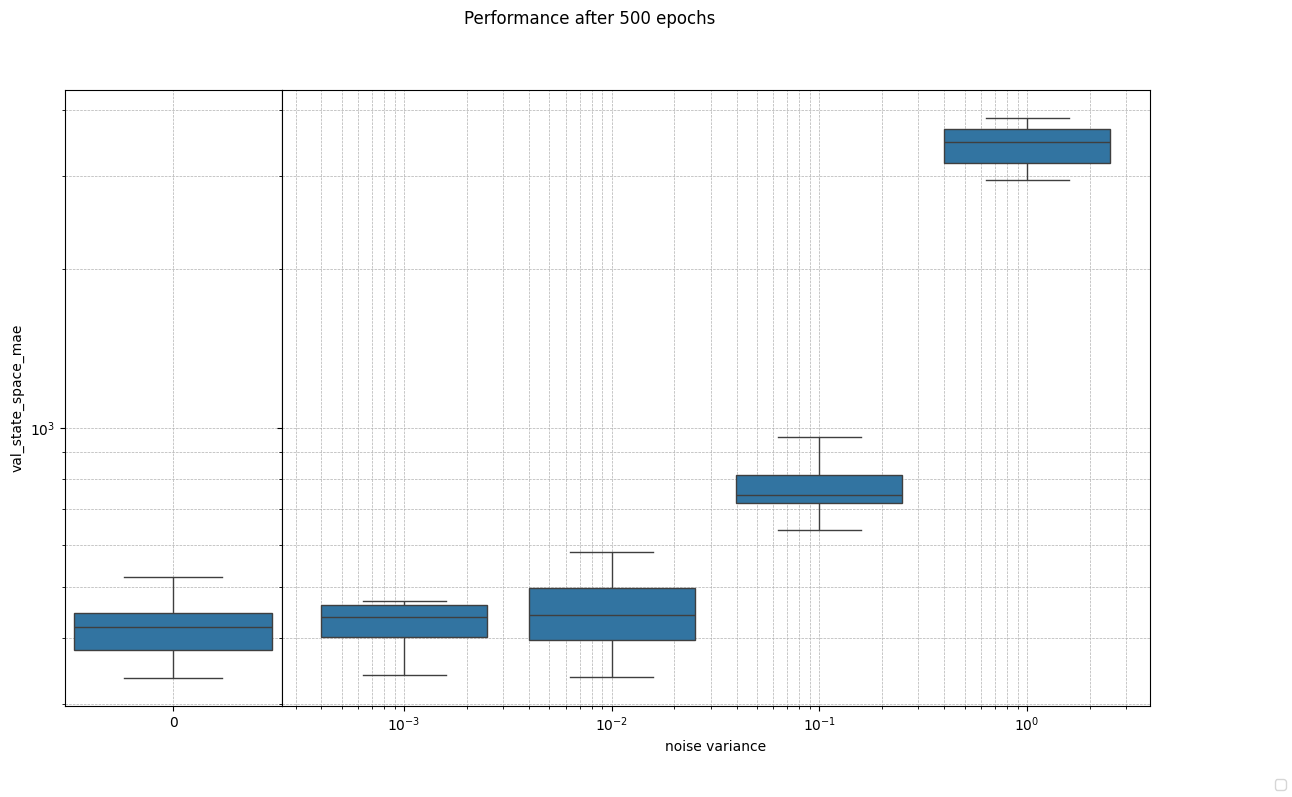

In [4]:
df = data_from_mlflow("noise influence","noise variance",filter_condition="params.static_offset_i = '0.0' AND params.grid_spacing = 'nan'")
boxplot_split(df,"noise variance","val_state_space_mae",None,True,True)

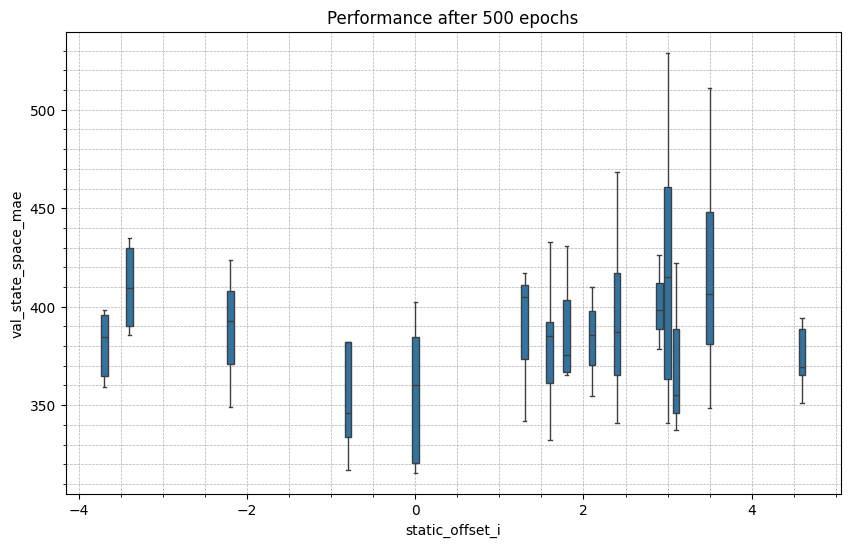

In [32]:
df = data_from_mlflow("noise influence","noise variance",filter_condition="params.'noise variance' = '0' AND params.grid_spacing = '50.0' AND params.hold_duration = '0.01' ")
df["static_offset_i"] = df["static_offset_i"].astype(float).round(1)
plot_boxplot(df,"static_offset_i","val_state_space_mae",None)

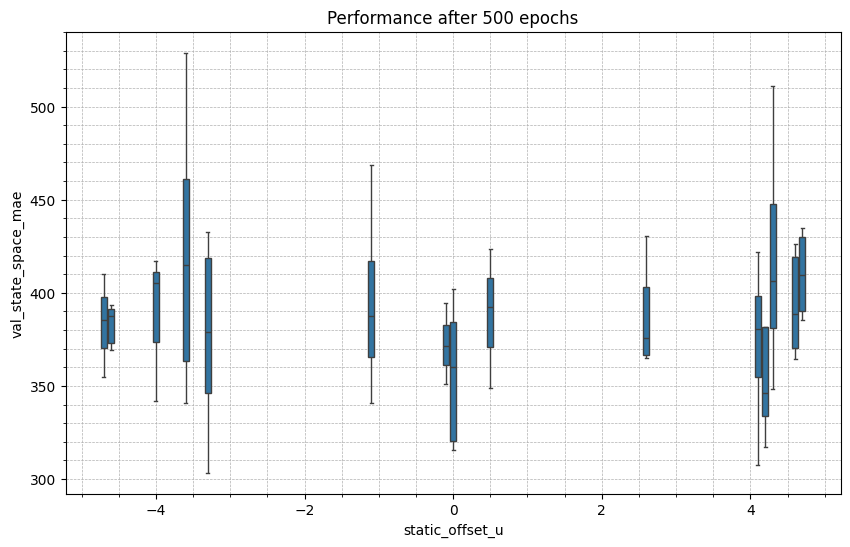

In [34]:
df = data_from_mlflow("noise influence","noise variance",filter_condition="params.'noise variance' = '0' AND params.grid_spacing = '50.0' AND params.hold_duration = '0.01' ")
df["static_offset_u"] = df["static_offset_u"].astype(float).round(1)
plot_boxplot(df,"static_offset_u","val_state_space_mae",None)

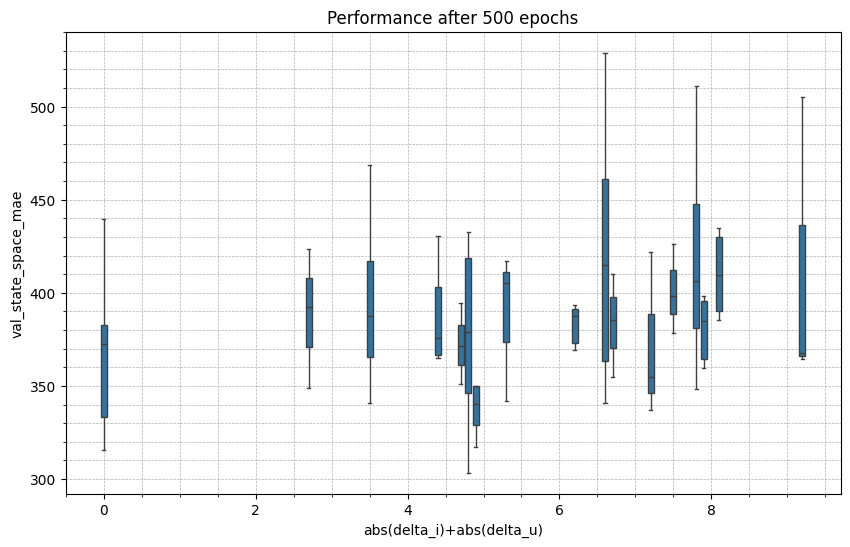

In [3]:
df = data_from_mlflow("noise influence","noise variance",filter_condition="params.'noise variance' = '0' AND params.grid_spacing = '50.0' AND params.hold_duration = '0.01' ")
df["abs(delta_i)+abs(delta_u)"] = df["static_offset_i"].astype(float).abs() + df["static_offset_u"].astype(float).abs()
df["abs(delta_i)+abs(delta_u)"] = df["abs(delta_i)+abs(delta_u)"].round(1)
plot_boxplot(df,"abs(delta_i)+abs(delta_u)","val_state_space_mae",None)

          sigma_u  hold_duration  val_psid_mae     val_r_mae       r_est  \
count  163.000000     163.000000    163.000000  1.630000e+02  163.000000   
mean     0.161718       0.003472      0.000455  1.431577e-04    0.023203   
std      0.366486       0.003013      0.000370  1.049404e-04    0.000128   
min      0.000000       0.001000      0.000065  8.403247e-08    0.022712   
25%      0.000000       0.001000      0.000180  6.670425e-05    0.023135   
50%      0.000000       0.001000      0.000302  1.247227e-04    0.023198   
75%      0.010000       0.005000      0.000681  1.941613e-04    0.023268   
max      1.000000       0.010000      0.002426  5.451040e-04    0.023625   

        val_l_mae  val_state_space_mae  custom_loss     r_true  val_psiq_mae  \
count  163.000000           163.000000   163.000000  163.00000    163.000000   
mean     0.000003           687.154188     0.703560    0.02308      0.000440   
std      0.000002           347.906198     1.069875    0.00000      0.00033

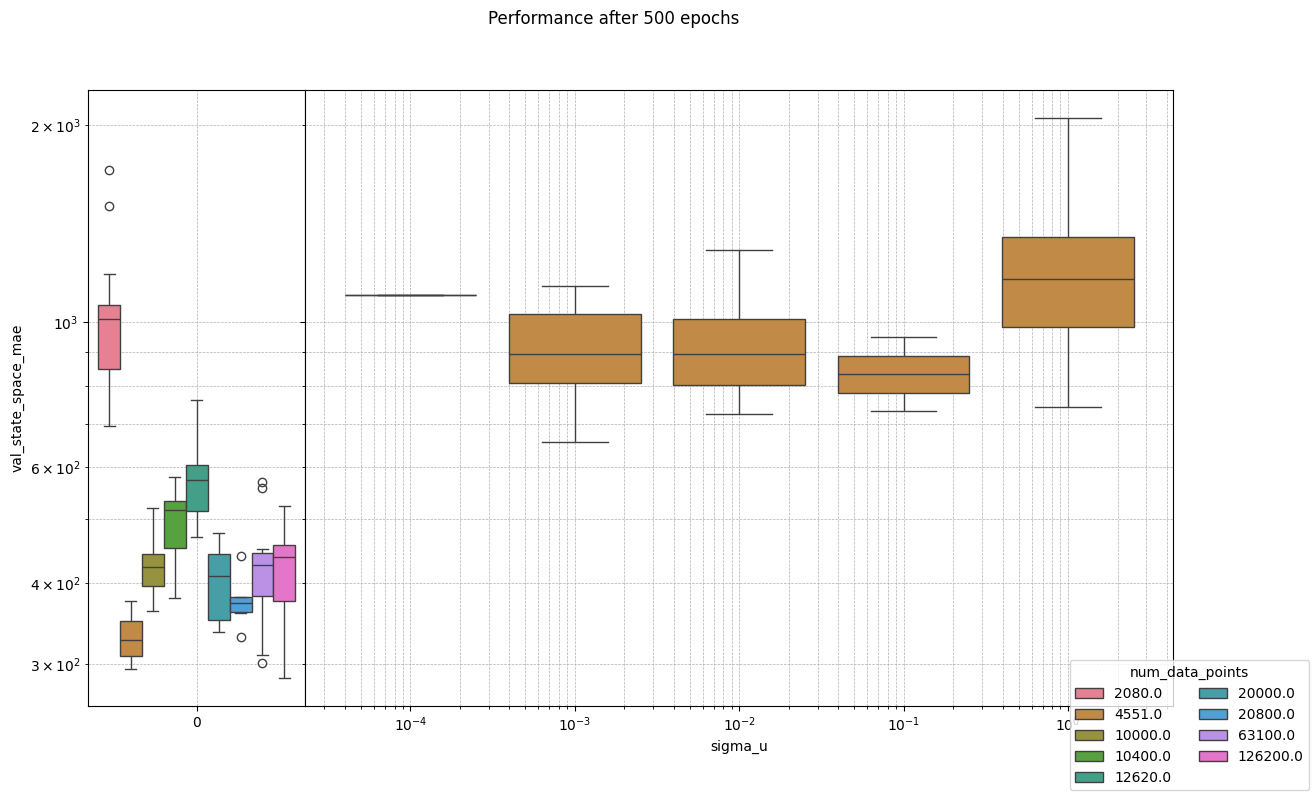

In [14]:
df = data_from_mlflow("noise influence","sigma_u",filter_condition="params.static_offset_i ='0.0' AND params.sigma_i = '0.0'")

df["hold_duration"] = df["hold_duration"].astype(float)
df["val_state_space_mae"] = df["val_state_space_mae"].astype(float)
df["num_data_points"] = df["num_data_points"].astype(float)
df["sigma_u"] = df["sigma_u"].astype(float)

#df.dropna(inplace = True,subset=["num_data_points"])
df.fillna(inplace=True,value={"num_data_points":4551})
print(df.describe())
boxplot_split_sorted(df,"sigma_u","val_state_space_mae","num_data_points",True,True)

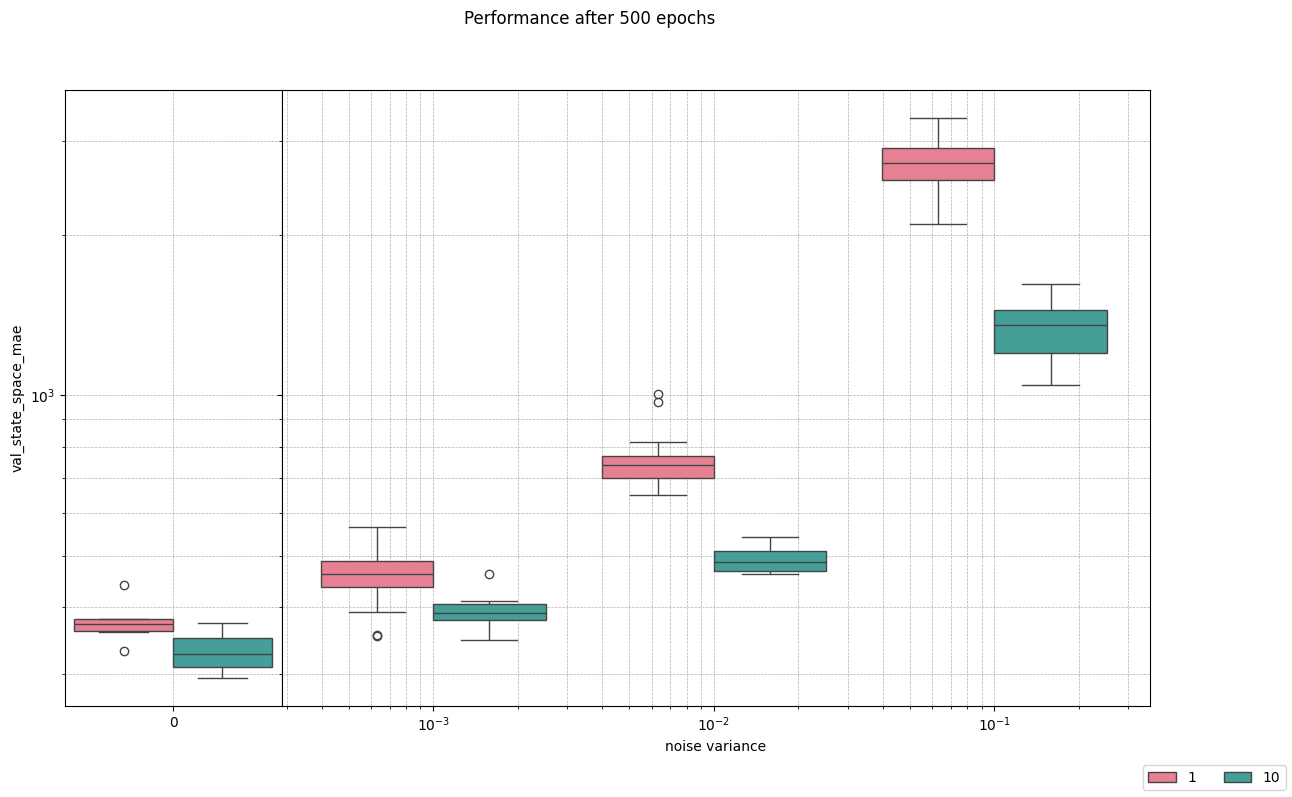

In [42]:
df1 = data_from_mlflow("noise influence","noise variance",filter_condition="params.static_offset_i ='0.0' ANd params.grid_spacing='50.0' AND params.hold_duration='0.01'")
df1["rounds"] = 1
df2 = data_from_mlflow("noise influence","noise variance",filter_condition="params.static_offset_i ='0.0' ANd params.grid_spacing='50.0' AND params.hold_duration='0.001'\
                      AND params.total_simulated_time='2.08'")
df2 = df2.fillna({"num_data_points":2.08*10000})
df2["rounds"] = 10
df = pd.concat([df1,df2])
df["hold_duration"] = df["hold_duration"].astype(float)
df["val_state_space_mae"] = df["val_state_space_mae"].astype(float)
df["num_data_points"] = df["num_data_points"].astype(float)
boxplot_split_sorted(df,"noise variance","val_state_space_mae","rounds",True,True)

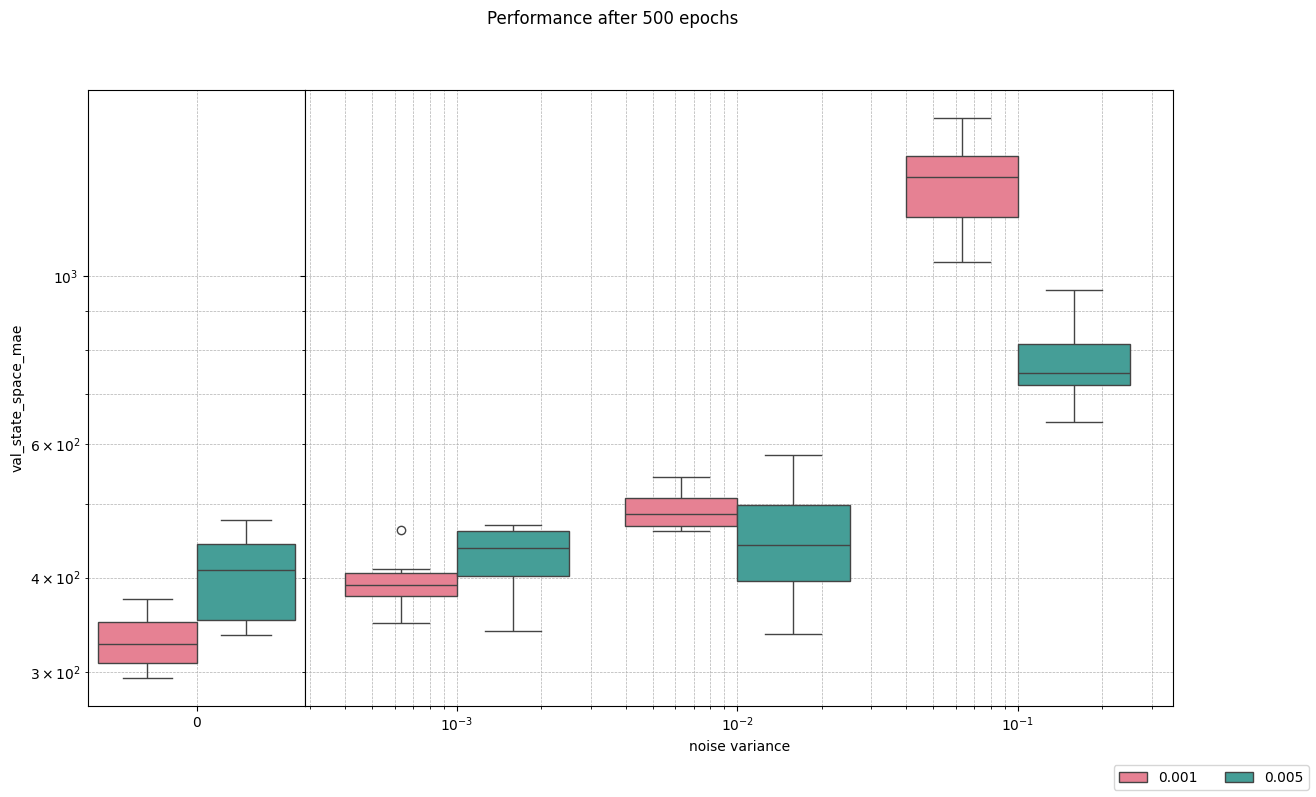

In [43]:
df = data_from_mlflow("noise influence","noise variance",filter_condition="params.grid_spacing='nan' AND params.num_data_points = '20000'")#params.total_simulated_time='2.0'
df["strategy"] = "random"
df["num_data_points"] = df["num_data_points"].astype(float)
df2 = data_from_mlflow("noise influence","noise variance",filter_condition="params.static_offset_i ='0.0' ANd params.grid_spacing='50.0' AND params.hold_duration='0.001'AND params.total_simulated_time='2.08'")
df2["num_data_points"] = 2.08*10000
df2["strategy"] = "grid"

df_combined = pd.concat([df,df2])
df_combined["hold_duration"] = df_combined["hold_duration"].astype(float)
boxplot_split_sorted(df_combined,"noise variance","val_state_space_mae","hold_duration",True,True)

In [ ]:
params.num_data_points = '20000' (OR params.static_offset_i ='0.0' ANd params.grid_spacing='50.0' AND params.hold_duration='0.001'AND params.total_simulated_time='2.08')

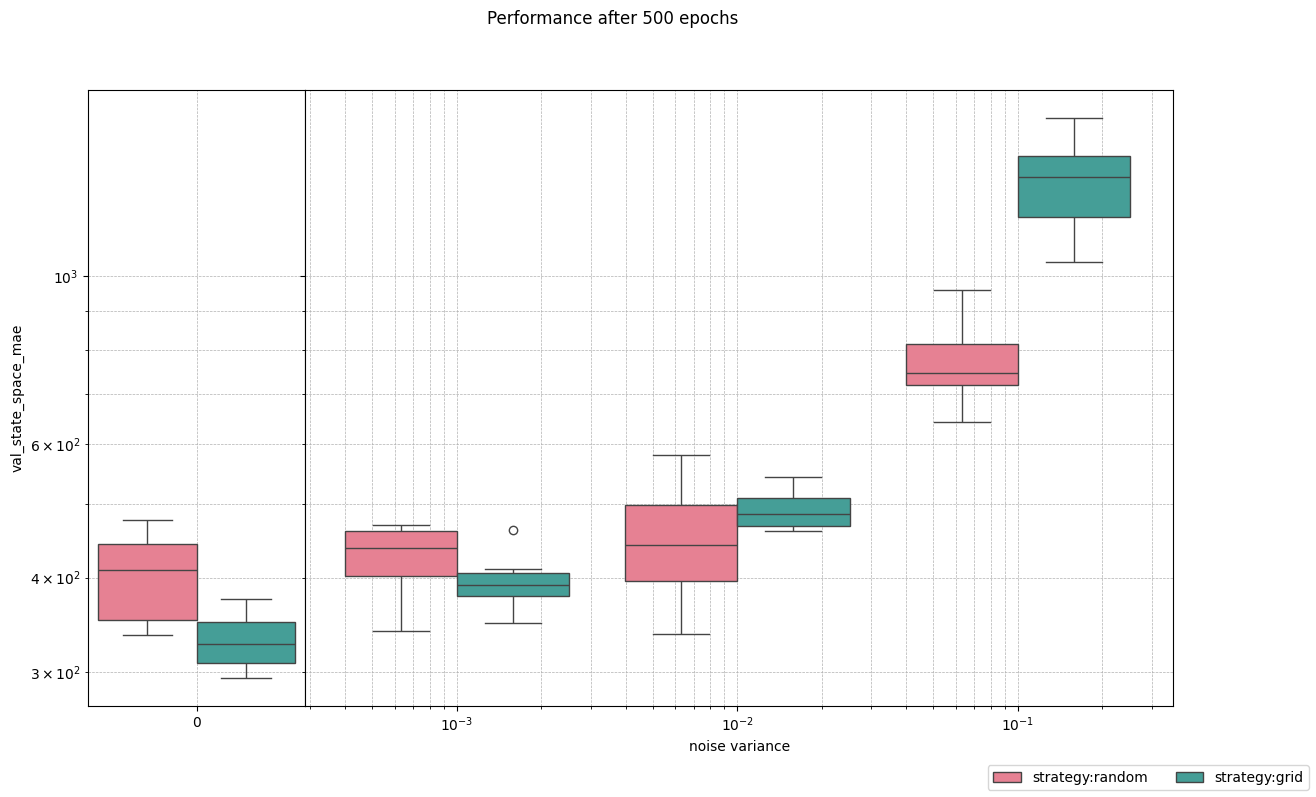

In [44]:
boxplot_split(df_combined,"noise variance","val_state_space_mae",["strategy"],True,True)

1742857200000


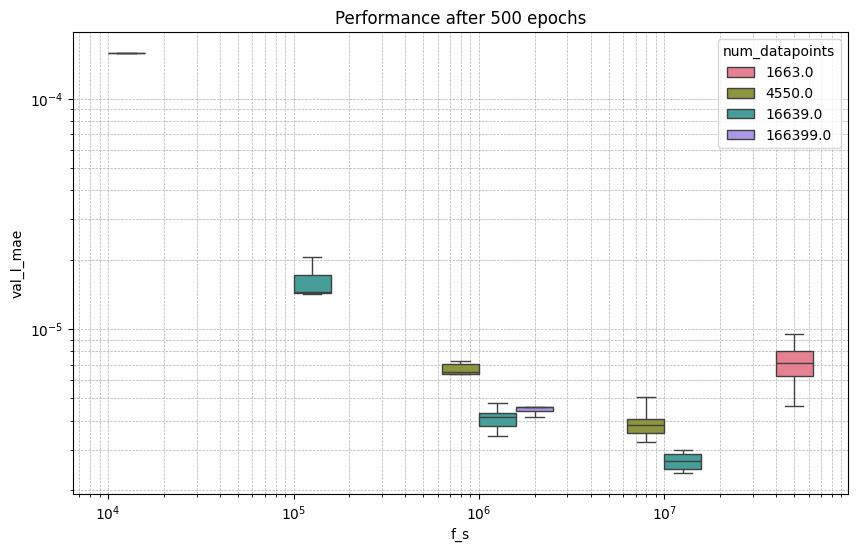

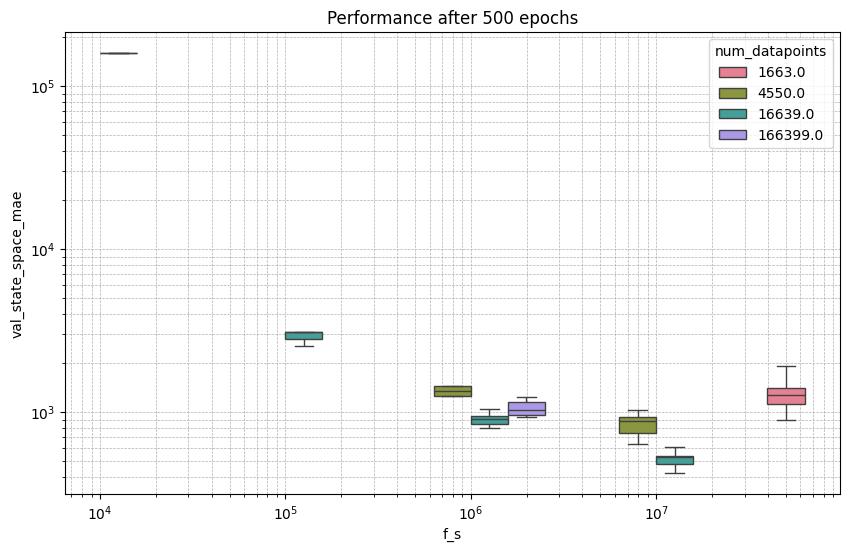

In [4]:
from datetime import datetime

# Define the specific date and time
specific_date_time = datetime(2025, 3, 25, 0, 0, 0)
# Get the timestamp in seconds
timestamp_in_seconds = int(specific_date_time.timestamp()*1000)
print(timestamp_in_seconds)

df = data_from_mlflow("sampling","sigma_u",filter_condition=f"attributes.created >= {timestamp_in_seconds}")

df["hold_duration"] = df["hold_duration"].astype(float)
df["val_l_mae"] = df["val_l_mae"].astype(float)
df["val_state_space_mae"] = df["val_state_space_mae"].astype(float)
df["num_datapoints"] = df["num_datapoints"].astype(float)
df["sigma_u"] = df["sigma_u"].astype(float)
df["f_s"] = df["f_s"].astype(float)

df.dropna(inplace = True,subset=["num_datapoints"])
#df.fillna(inplace=True,value={"num_data_points":4551})
#print(df.describe())
plot_boxplot(df,"f_s","val_l_mae","num_datapoints",x_log=True,y_log=True)
plot_boxplot(df,"f_s","val_state_space_mae","num_datapoints",x_log=True,y_log=True)